# PHYS 6260: Homework 6, Michael Haynes

In [1]:
## import everything
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
import math as m
import time as time

## Problem 1: Parallel Monte Carlo Solver
### The Nuclear Decay Equation
The $^8\mathrm{Li}$ isotope is unstable and has a half life $\tau_{1/2} = 838.73 \cdot 10^{-3} \,\mathrm{s}$. The $\beta^-$ decay of $^8\mathrm{Li}$ converts a neutron in the atom's nucleus to a proton and electron (with an anti-neutrino), yielding $^8\mathrm{Be}$. The decay rate of this isotope can be represented by a simple analytical form. For a $^8\mathrm{Li}$ population of number $N$, the conversion of one species to the other follows
$$ \frac{\mathrm{d}N}{\mathrm{d}t} = -\lambda N = -\frac{\log{(2)} N}{\tau_{1/2}} \qquad .$$
Direct integration yields
$$ N(t) = N_0 e^{-\lambda t} \qquad .$$  
We will model this process by using a Monte Carlo method. This consists of generating random numbers on the unit interval and comparing them to probabilities in order to evaluate random processes. These direct simulations provide an ability to learn the governing behavior while also adding complexity beyond the (sometimes) simple, smooth analytical solution. This method is thus used frequently in modeling atomic or nuclear processes, such as this. 
#### Part (a): Write a function to model the decay of $^8\mathrm{Li}$
_Note: we use the code provided in the file 08_decay0.py on Canvas as a starter template for this function_

In [2]:

def NucDecay(Ns1,Ns2,tau,tmax,NUM):
    tpoints = np.linspace(start=0.0,stop=tmax,num=1000)
    h = tpoints[1] - tpoints[0]
    
    # initialize probability of single transition
    p = 1 - 2**(-h/tau)   # Probability of decay in one step

    # Lists of plot points
    S1points = []
    S2points = []
    
    # Main loop
    for n,t in enumerate(tpoints):
        S1points.append(Ns1)
        S2points.append(Ns2)

        # Calculate the number of decayed atoms in each timestep h
        rand_arr = np.random.random(S1points[n])
        new_s2 = (rand_arr < p).sum()
        
        Ns1 -= new_s2
        Ns2 += new_s2

    return tpoints,S1points,S2points


Ns1 = 1000            # Number of species 1 atoms (the species undergoing decay, in this case, Li)
Ns2 = 0               # Number of species 2 atoms (the daughter isotope)
tau = 838.7e-03       # Half life of species 1 in seconds
tmax = 1              # Total time
NUM = 1000


tpoints, S1points, S2points = NucDecay(Ns1,Ns2,tau,tmax,NUM)


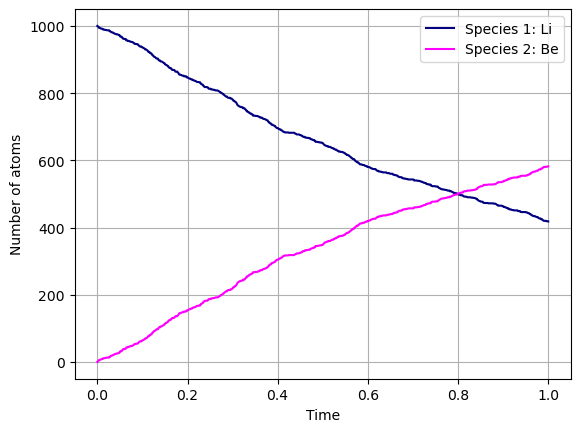

In [3]:
    
# Simple plot routine
plt.plot(tpoints,S1points, color='navy',label='Species 1: Li')
plt.plot(tpoints,S2points, color='magenta', label='Species 2: Be')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()


plt.show()

#### Part (b): Evaluate the function from part (a) ten times, and determine the computing resources needed

time elapsed: 0.0973 seconds


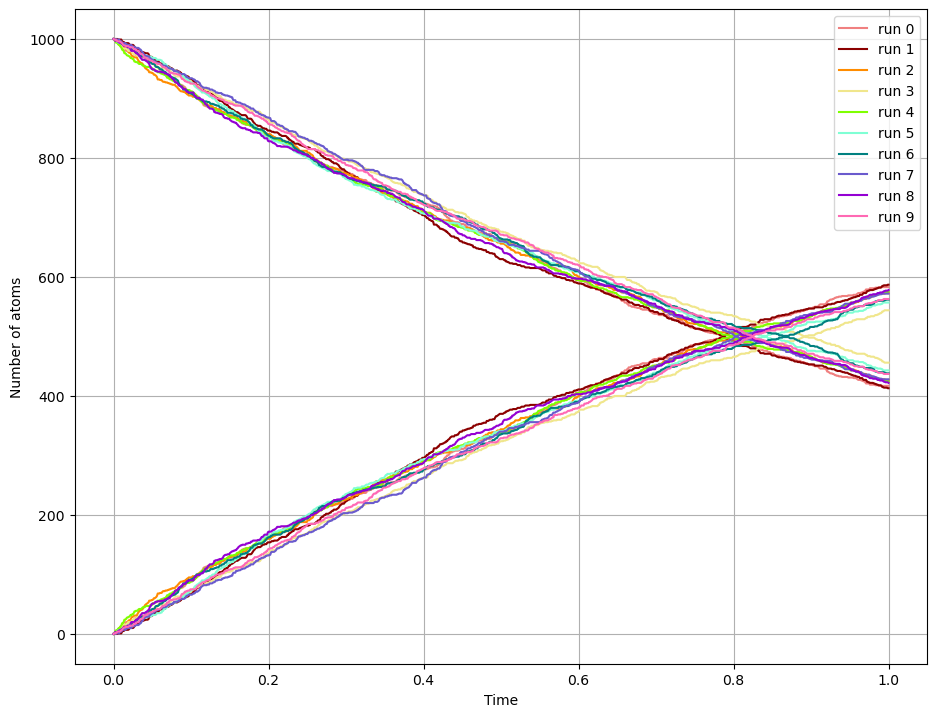

In [4]:
t_start = time.time()

num_runs = 10
S1_arrs = []
S2_arrs = []

# loop over 10 different function calls. Since no seed is ex
for i in range(num_runs):
    tpoints, S1points, S2points = NucDecay(Ns1,Ns2,tau,tmax,NUM)
    S1_arrs.append(S1points)
    S2_arrs.append(S2points)

t_stop = time.time()
tdel = round(t_stop-t_start,4)
print("time elapsed: "+str(tdel)+" seconds")

# define 10 spaced colors to display each pair on top of each other
colors = ['lightcoral', 'darkred', 'darkorange', 'khaki', 'chartreuse', 'aquamarine', 'teal', 'slateblue','darkviolet','hotpink']

# loop over arrays generated above (inside timer) to display results
fig, ax = plt.subplots(figsize=(11,8.5))
for i in range(num_runs):
    Lab = 'run '+str(i+1)
    plt.plot(tpoints,S1_arrs[i],color=colors[i],label=Lab)
    plt.plot(tpoints,S2_arrs[i],color=colors[i])
# plot everything
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()
plt.show()

#### Part (c): Use the Multiprocessing module to parallelize the code from part (b)

In [5]:
import multiprocess as multiprocessing
import os

In [6]:
# define modified function from part (a) that changes the data structure passed in, so that the multiple arguments can be passed via "pool"
def NucDecayMulti(array_args):
    Ns1 = array_args[0]
    Ns2 = array_args[1]
    tau = array_args[2]
    tmax = array_args[3]
    NUM = array_args[4]

    np.random.seed()
    
    tpoints = np.linspace(start=0.0,stop=tmax,num=NUM)
    h = tpoints[1] - tpoints[0]
    
    # initialize probability of single transition
    p = 1 - 2**(-h/tau)   # Probability of decay in one step

    # Lists of plot points
    S1points = []
    S2points = []
    
    # Main loop
    for n,t in enumerate(tpoints):
        S1points.append(Ns1)
        S2points.append(Ns2)

        # Calculate the number of decayed atoms in each timestep h
        rand_arr = np.random.random(S1points[n])
        new_s2 = (rand_arr < p).sum()
        
        Ns1 -= new_s2
        Ns2 += new_s2

    return tpoints,S1points,S2points

a_arr = [Ns1,Ns2,tau,tmax,NUM]

tpoints, S1Mfunc, S2Mfunc = NucDecayMulti(a_arr)


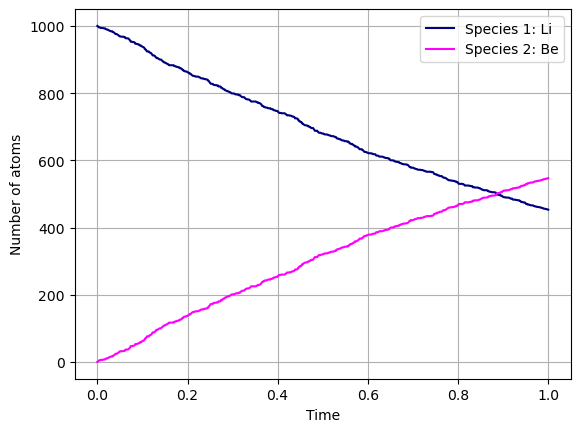

In [7]:
    
# Simple plot routine to verify the new function works
plt.plot(tpoints,S1Mfunc, color='navy',label='Species 1: Li')
plt.plot(tpoints,S2Mfunc, color='magenta', label='Species 2: Be')
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()


plt.show()

In [12]:
# define vars like number of processors used, and the args to pass to the function in each instance
nprocs = 6
numRuns = 10
args_arr = []
for i in range(numRuns):
    args_arr.append(a_arr)

# start clock for parallel stuff
time0 = time.time()
pool = multiprocessing.Pool(processes=nprocs)

result = pool.map(NucDecayMulti, args_arr)
timeE = time.time()
tdel2 = round(timeE-time0,4)
print("time elapsed: "+str(tdel2)+" seconds")

time elapsed: 0.3007 seconds


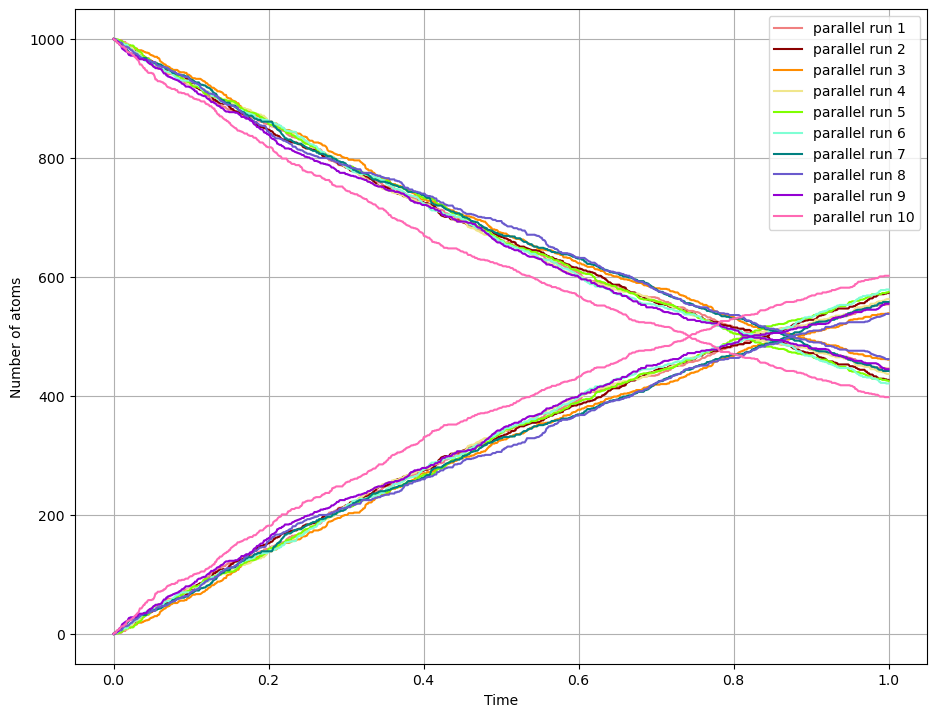

In [14]:
# plot the output
fig, ax = plt.subplots(figsize=(11,8.5))
# loop over outputs (thankfully we chose as many processors as we have colors)
for i in range(numRuns):
    times = result[i][0][:]
    ns1 = result[i][1][:]
    ns2 = result[i][2][:]
    lab = 'parallel run '+str(i+1)
    plt.plot(times,ns1,colors[i],label=lab)
    plt.plot(times,ns2,colors[i])
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.grid()
plt.legend()
plt.show()

## Problem 2 (run and include as script)
See HW6-Nbody0.py for a serial version to parallelize.

In this notebook below, include your particle position plot at the final time and your parallel efficiency code and plot here.

## Problem 3